<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/The_Perceptron_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">O Perceptron: Regressão Logística</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

![](https://estatsite.com.br/wp-content/uploads/2018/08/1-3.jpg)

# Regressão Logística

No Script anterior aprendimos a utilizar o Perceptron para uma task de `Classificação Binâria`. Para isso usamos uma função de ativação de tipo `Step` (que nos dá uma saída de $0$ ou $1$) e treinamos o Perceptron mediante o algoritmo de `Descenso por Gradiente` utilizando o `Erro quadrático médio` (MSE) como função de perda. No entanto, não sempre estaremos interessados simplesmente em conhecer se um elemento em particular pertence a uma classe ou não, senão também o Grau de confiança com o que nosso modelo fornece cada predição. Para isso precisamos que nosso Perceptron seja capaz de fornecer uma `PROBABILIDADE` à saída. Esta saída será um valor entre $0$ e $1$ (a diferença do modelo anterior em que a saída era $0$ ou $1$)sendo $0$ a absoluta certeza de que o elemento em questão não pertence à classe que nos interessa e $1$ a absoluta certeza de que sim pertence. Um valor intermediário uma baixa segurança por parte do modelo (podemos utilizar está informação para melhorar o algoritmo adicionando mais Dados similares). Um valor de $0.5$ indicará que nosso modelo não tem nem a mais remota ideia de como classificar o elemento utilizado como entrada. 

# Função de Ativação

Aqui, seguiremos trabalhando com o mesmo modelo de `Perceptron`.

![](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)




A principal diferença é que neste modelo de `Regressão Logística`, utilizaremos uma função de Ativação conhecida como <font color="yellow">Sigmoid</font>:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Esta função recebirá uma entrada e entregará uma probabilidade (um valor entre $0$ e $1$).

In [ ]:
# Carregamos as nossas bibliotecas

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Criamos a nossa função

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

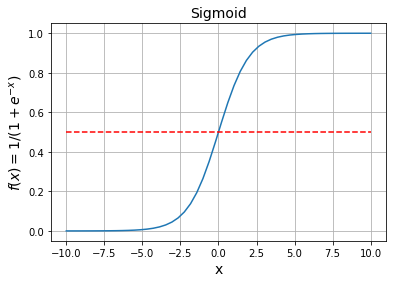

In [ ]:
x = np.linspace(-10, 10)
y = 1. / (1. + np.exp(-x))

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = 1/(1 + e^{-x})$', fontsize=14)
plt.title('Sigmoid', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--r')
plt.show()


Como podemos observar, os valores muito negativos saturam a um valor $0$, enquanto que os valores muito positivos saturam a um valor $1$.  

# Função de Perda

Poderíamos tentar treinar nosso modelo `Regresión logísitca` com a função de perda que já conhecemos, `MSE`, e funcionaria muito bem, pois estamos forçando a saída a receber o valor $0$ ou $1$ baseado no ground truth. No entanto, vamos a introduzir uma nova função de perda muito utilizada quando trabalhamos com modelos probabilísticos já que fornecem como resultado um melhor processo de Optimização. Esta função é conhecida como `Binary Cross Entropy`, ou também com o nome de `Log Loss`:

$$ J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{y}^{(j)}) + (1-y^{(j)})log(1-\hat{y}^{(j)})\right] $$


Como podemos observar, quando o ground seja $0$ só ficará o segundo termo, $log(1-\hat{y})$. Neste caso, se a saída do modelo é correta e nos dá um valor perto a $0$ obteremos um valor da função de perda pequeno. No entanto, se o modelo errar e dá uma probabilidade alta, o valor da função de perda será muito grande indicando um alto erro (observa o signo negativo ao princípio da experessão, necessário já que o limite quando $x$ tende a $0$ do logaritmo é $- \infty$ porém necessitamos valores positivos para indicar error). O mesmo se aplica ao caso contrário no que o *ground truth* seja $1$, porém com o primeiro termo.  

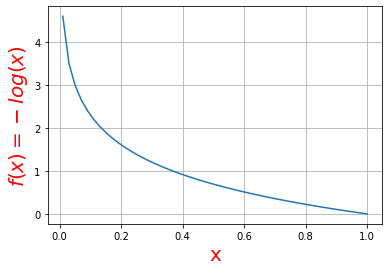

In [ ]:
x = np.linspace(0.01, 1)
y =  -np.log(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=20, c='r')
plt.ylabel('$f(x) = - log(x)$', fontsize=20, c='r')
plt.show()